Check out the Data Set at the following link:
https://www.kaggle.com/c/titanic-gettingStarted

Download the train.csv file and save it to the same location as your iPython Notebooks.

In [1]:
# Import the packages
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# General review of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check data_type and size
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some basic questions have to know fist:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Maybe think more:
 - What factors helped someone survive the sinking?


In [4]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First let's look at gender:

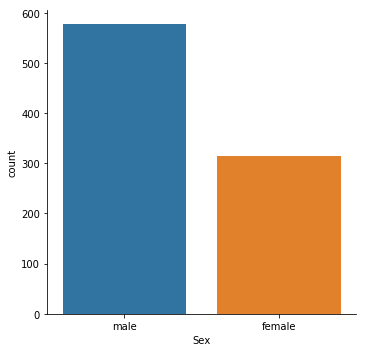

In [7]:
sns.catplot('Sex',data=titanic_df,kind="count")
# You can also change your preference of color by passing the argument【 palette='winter'】or 【 palette='summer'】
# eample ： sns.catplot('Sex',data=titanic_df,kind="count",palette='winter')

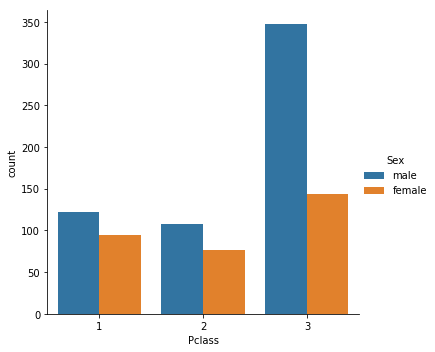

In [8]:
# We can seperate the genders by classes, using the 'hue' arguement !
sns.catplot('Pclass',data=titanic_df,kind="count",hue='Sex')

Well, it seems that there are more males in the 3rd class than females. Also,it might be useful to know the split between males,females,and children. 

We treat anyone as under 16 as a child, here we use the apply function to create a new column named ['person'] based on Sex, Age

In [9]:
# There are also other more simple ways to realize it
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', add axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [10]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Success ! 
Now we have seperated the passengers between female,male,and child.Now it's time to prove  the famous "Women and children first policy"  ^.^

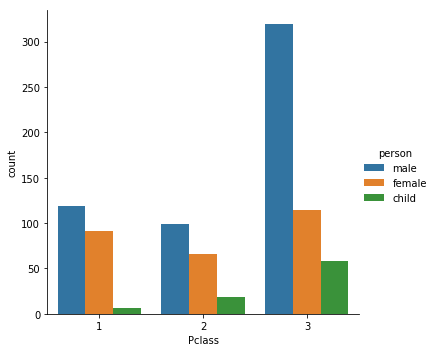

In [11]:
# Using the factorplot again!
sns.catplot('Pclass',data=titanic_df,kind='count',hue='person')

There are more children in the 3rd class, not so many in the 1st class, we need a distribution here to get a more precise picture

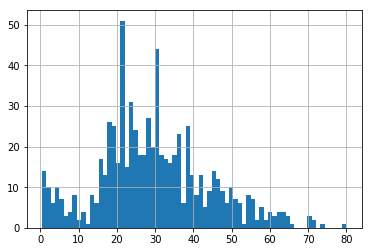

In [29]:
# A histogram of Age with pandas
titanic_df['Age'].hist(bins=70)

In [31]:
# A quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

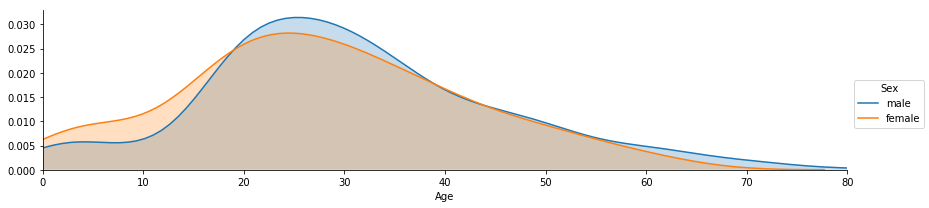

In [32]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

Here we get the distribution of age by sex, we'll do the same thing for column "person" and "Pclass"

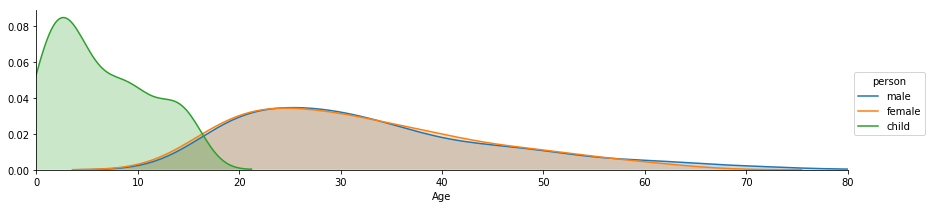

In [33]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

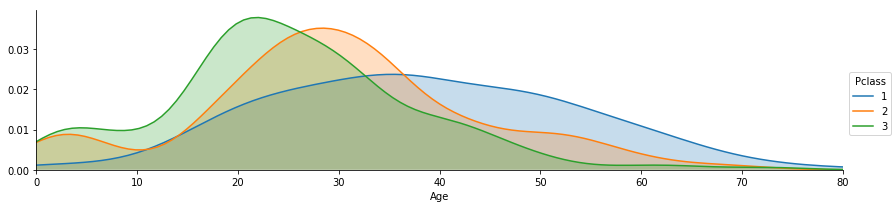

In [34]:
# Let's do the same for class by changing the hue argument
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

So far, we have answered the first question, we know who are the passengers based on Sex，Age，Class, we can continue to the second question: What deck were the passengers on and how does that relate to their class?

In [23]:
# Quick review of our dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [16]:
# Drop the Null values of the column "Cabin", name it "deck"
deck = titanic_df['Cabin'].dropna()

In [24]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [25]:
# We can find out that there are 687 missing values for the column "Cabin"
titanic_df.shape[0]-deck.shape[0]

687

We only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

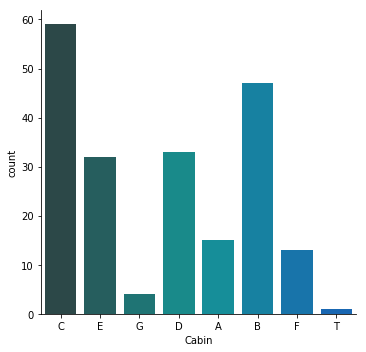

In [37]:
#let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,kind="count",palette='winter_d')

We can notive that there is  a 'T' deck value there which doesn't make sense, we can drop it out

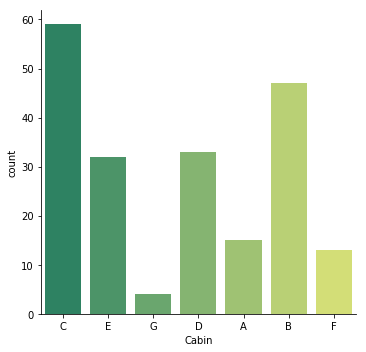

In [41]:
# Redefine cabin_df  where the row doesn't equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.catplot('Cabin',data=cabin_df,kind="count",palette='summer')

Note that we can use 'summer_d' or 'winter_d' to make the color darker,now that we've analyzed the distribution by decks, we continue to the third question:

3.) Where did the passengers come from?